# <b>A. <span style='color:#0B2F9F'><code>PREFIX</code></span></b>
Prefix merupakan penggunaan awalan pada nama tabel untuk memberikan informasi tambahan atau untuk mengelompokkan objek-objek tertentu. Sebagai contoh perhatikan gambar berikut : <br><br>

<img src="https://raw.githubusercontent.com/bachtiyarma/Material/refs/heads/main/Image/Materi-SQL/SQL%20-%20Prefix.png" width="50%">

<br><br>
Nama tabel dimisalkan (diberi alias) sebagai tbl, lalu untuk mengakses kolom pada tabel tersebut bisa diberi prefix tbl.kolom1 dan seterusnya

#### <i><b><span style='color:#55679C'>Quest</span> : Pada tabel customer_demography, ambil kolom customer_id, gender, age dan married namun gunakan alias 'cdm' pada nama tabel dan sematkan prefixnya saat mengakses kolom!</b></i>

In [ ]:
select cdm.customer_id, cdm.gender, cdm.age, cdm.married from `Telco_churn.customer_demography` as cdm

customer_id,gender,age,married
8779-QRDMV,Male,78,No
7495-OOKFY,Female,74,Yes
1658-BYGOY,Male,71,No
4598-XLKNJ,Female,78,Yes
4846-WHAFZ,Female,80,Yes
4412-YLTKF,Female,72,No
0390-DCFDQ,Female,76,Yes
3445-HXXGF,Male,66,Yes
2656-FMOKZ,Female,70,No
2070-FNEXE,Female,77,No


# <b>B. <span style='color:#0B2F9F'><code>JOIN</code></span></b>

Data biasanya disimpan di berbagai tabel atau sistem yang berbeda pada RDBMS (Relational Database Management System). JOIN memungkinkan pengguna untuk menggabungkan data dari berbagai sumber untuk mendapatkan gambaran yang lebih lengkap. Memahami query JOIN memungkinkan seorang pengguna untuk mengintegrasikan dan menganalisis data secara efektif, sehingga dapat meningkatkan kualitas analisis dan mendukung pengambilan keputusan berbasis data.

Operasi JOIN standar dapat dilakukan jika terdapat kunci pada tiap tabel yang saling terhubung. Operasi join dasar yang paling umum digunakan ada 4 yakni :
<ul>
    <li><b>LEFT JOIN</b></li>
    LEFT JOIN adalah jenis operasi penggabungan baris dari dua tabel, tetapi hanya mengembalikan semua baris dari tabel kiri (tabel pertama) dan baris yang cocok dari tabel kanan (tabel kedua). Jika tidak ada kecocokan di tabel kanan, maka nilai-nilai untuk kolom dari tabel kanan akan diisi dengan NULL.<br><br>
    <img src="https://thomasadventure.blog/img/left-join-extra.gif" width="20%">
    <br><br>
    <li><b>RIGHT JOIN</b></li>
    RIGHT JOIN adalah jenis operasi penggabungan baris dari dua tabel, tetapi hanya mengembalikan semua baris dari tabel kanan (tabel kedua) dan baris yang cocok dari tabel kiri (tabel pertama). Jika tidak ada kecocokan di tabel kiri, maka nilai-nilai untuk kolom dari tabel kiri akan diisi dengan NULL.<br><br>
    <img src="https://thomasadventure.blog/img/right-join.gif" width="20%">
    <br><br>
    <li><b>INNER JOIN</b></li>
    INNER JOIN adalah jenis operasi penggabungan yang hanya mengembalikan baris yang memiliki kecocokan di kedua tabel berdasarkan kriteria tertentu.<br><br>
    <img src="https://thomasadventure.blog/img/inner-join.gif" width="20%">
    <br><br>
     <li><b>FULL JOIN</b></li>
    FULL JOIN adalah jenis operasi penggabungan semua baris dari kedua tabel, baik yang memiliki kecocokan maupun yang tidak. Dengan demikian, hasilnya akan mencakup semua data dari tabel kiri dan tabel kanan.<br><br>
    <img src="https://thomasadventure.blog/img/full-join.gif" width="20%">
    <br><br>
</ul>

#### <i><b><span style='color:#55679C'>Info</span>
Untuk melakukan join biasanya akan lebih mudah jika arsitektur relasi antar tabel atau biasa dikenal ERD (Entity Relational Diagram) telah dibuat atau diketahui. Pada data telco churn ERD-nya disajikan pada gambar berikut<br><br>

<img src="https://raw.githubusercontent.com/bachtiyarma/Material/refs/heads/main/Image/Materi-SQL/ERD%20-%20Telco%20Churn.png" width="40%">

#### <i><b><span style='color:#55679C'>Quest : </span>Hitung berapa rata-rata biaya bulanan tiap status customer! Tampilkan status, total_customer, avg_monthly_charge! Interpretasikan insight dari hasil perhitungan!

In [ ]:
SELECT A.status, count(A.customer_id) as total_customer, round(avg(B.monthly_charge),2) as avg_monthly_charge
from `Telco_churn.customer_status` as A
LEFT JOIN Telco_churn.telco_services AS B
ON A.customer_id = B.customer_id
GROUP BY A.status

status,total_customer,avg_monthly_charge
Churned,1869,74.44
Joined,454,43.47
Stayed,4720,62.98


<b><span style='color:#FFDB00'><i>Interpretasi Hasil : </i></span></b><br>
Didapatkan bahwa harga tinggi kemungkinan menjadi faktor utama churn.
Pelanggan baru membayar paling rendah, menandakan adanya diskon atau promosi lainnya.
Masih banyak juga yang tetap loyal dengan harga lumayan. mungkin bisa diadakan paket yang lebih sesuai dengan kebutuhan untuk menghindari harga tinggi sehingga dapat mempertahankan pelanggan.

#### <i><b><span style='color:#55679C'>Quest : </span>Bagaimana dengan total tenure ? Hitung berapa rata-rata tenure_in_month tiap status customer! Tampilkan status, total_customer, avg_tenure_in_month! Interpretasikan insight dari hasil perhitungan!

In [ ]:
SELECT A.status, count(A.customer_id) as total_customer, round(avg(B.tenure_in_months),2) as avg_TIM
from `Telco_churm.customer_status` as A
LEFT JOIN Telco_churm.telco_services AS B
ON A.customer_id = B.customer_id
GROUP BY A.status

status,total_customer,avg_tenure_in_month
Churned,1869,17.98
Joined,454,1.72
Stayed,4720,41.04


<b><span style='color:#FFDB00'><i>Interpretasi Hasil : </i></span></b><br>
Pelanggan yang membayar lebih tinggi dan belum lama bergabung lebih berisiko berhenti langganan atau churn, sedangkan pelanggan yang sudah lama cenderung loyal meskipun tarif mereka lebih rendah dari yang churn.

#### <i><b><span style='color:#55679C'>Quest : </span>Perusahaan telekomunikasi ingin melakukan perluasan market ke beberapa daerah yang mana di daerah tersebut belum ada pelanggan terdaftar dalam database. Buatkan daftar kode pos pada tabel population yang sama sekali belum ada orang yang menggunakan layanan telekomunikasi! Tampilkan kode pos dan jumlah populasinya!

In [ ]:
SELECT A.zip_code, A.population AS population, count(B.customer_id) as total_customer
from Telco_churm.population as A
LEFT JOIN Telco_churm.customer_location AS B
ON A.zip_code = B.zip_code
GROUP BY A.zip_code, A.population
HAVING count(B.customer_id) = 0


zip_code,population,total_customer
91402,66249,0
95023,47514,0
90020,42394,0
92307,31876,0
93555,29782,0
95531,23792,0
92277,17178,0
96161,15783,0
93640,9174,0
96064,4592,0


<b><span style='color:#FFDB00'><i>Interpretasi Hasil : </i></span></b><br>
wilayah dengan zip code ini belum dijangkau oleh layanan,hal ini bisa menjadi peluang bisnis untuk memperluas area layanan, dengan mengutamakan pada zip code yang populasinya tinggi

#### <i><b><span style='color:#55679C'>Tugas Tambahan: </span> Identifikasi daerah atau kota yang memiliki tingkat churn tertinggi

In [ ]:
SELECT  A.city,  A.state, count(B.customer_id) AS total_customer
from `Telco_churm.customer_status` AS B
JOIN `Telco_churm.customer_location` AS A
ON  B.customer_id = A.customer_id
where  B.status = "Churned"
GROUP BY  A.city, A.state
order by total_customer desc
limit 1

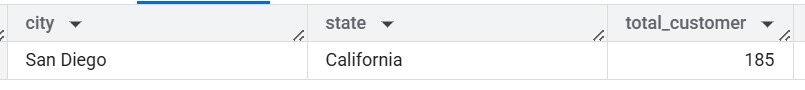